# Routed Sequencing with Cleanup Memory

This model extends the routed sequencing model by creating a scalar ensemble 'cleanup' as explained in the book. You will project the 'state' on to the 'cleanup' ensemble using a transformation matrix 'pd', specified by the vocabulary vector 'A'. This implies that each component of the state vector (i.e., the cortical element) is multiplied by the corresponding component of the 'A' vector and summed to produce a one dimensional quantity represented by the 'cleanup' ensemble. This operation is similar to the dot product of the state vector and the vocabulary vector 'A'.

In [1]:
#Setup for the notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import nengo
from nengo import spa
from nengo.spa import Vocabulary

## Create the Model

This model has parameters as described in the book, with a one dimensional cleanup ensemble consisting of 100 neurons.

In [10]:
#Number of dimensions for the Semantic Pointers
dimensions = 16

#Make a model object with the SPA network
model = spa.SPA(label='Routed_Sequence with cleanupA', seed=12)

with model:
    #Specifying the modules to be used
    model.state = spa.State(dimensions=dimensions, feedback=1, feedback_synapse=0.01)
    model.vision = spa.State(dimensions=dimensions) 
    
    # Specify the action mapping
    actions = spa.Actions(
        'dot(vision, START) --> state = vision',
        'dot(state, A) --> state = B',
        'dot(state, B) --> state = C',
        'dot(state, C) --> state = D',
        'dot(state, D) --> state = E',
        'dot(state, E) --> state = A'
    )
    
    #Creating the BG and Thalamus components that confirm to the specified rules
    model.BG = spa.BasalGanglia(actions=actions)
    model.thal = spa.Thalamus(model.BG)
    
    #Change the seed of this RNG to change the vocabulary
    rng = np.random.RandomState(0)
    vocab = Vocabulary(dimensions=dimensions)

    #Create the transformation matrix (pd) and the cleanup ensemble (cleanupA) 
    pd = [vocab['A'].v.tolist()] 
    model.cleanup = spa.State(neurons_per_dimension=100, dimensions=1)
    
    #Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.4:
            return '0.8*START+D'
        else:
            return '0'

    #Input
    model.input = spa.Input(vision=start)
    
    #Projecting the state of the cortex on to the cleanup ensemble using a transformation matrix 'pd'.
    nengo.Connection(model.state.output, model.cleanup.input, transform=pd)

## Run the Model

In [ ]:
#Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "spa_sequencerouted_cleanup.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The graph on the bottom-left shows the semantic pointer representation of the values stored in the `state` and the response of the `cleanup` population is shown in the graph on the bottom-right. The graph on the top-right shows the utility (similarity) of the current basal ganglia input (i.e., `state`) with the possible vocabulary vectors. Since the cleanup operation is similar to a dot product between the state of the cortical element (`state`) and the defined vocabulary vector 'A', the value of the `cleanup` population rises only when the `state` (top-right graph) is 'A'. 

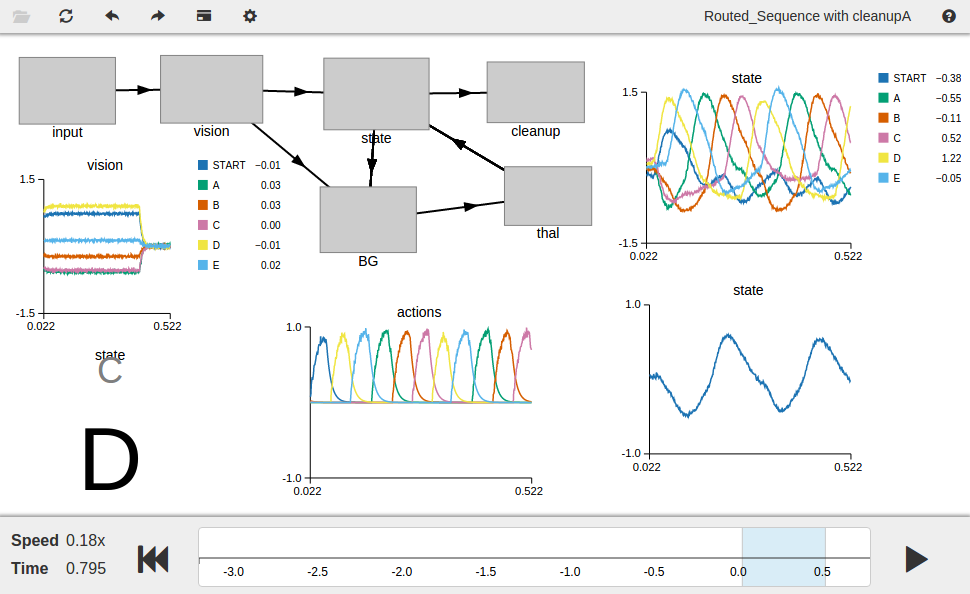

In [13]:
from IPython.display import Image
Image(filename='spa_sequencerouted_cleanup.png')